<a href="https://colab.research.google.com/github/navinavin33/Practical-Discrete-Mathematics/blob/master/BTMH1013_2024C_Assignment_B240007A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 A

In [ ]:
from sympy import factorint

def smallest_prime_and_order(n):
    """
    Calculate the smallest prime p(n) dividing n and the p-adic order alpha(n).
    """
    factors = factorint(n)  # Factorize n into primes
    smallest_prime = min(factors)  # Smallest prime factor
    alpha = factors[smallest_prime]  # p-adic order
    return smallest_prime, alpha

def f_k(n, K):
    """
    Compute f_K(n) = (alpha(n) - 1) / (p(n))^K
    """
    p, alpha = smallest_prime_and_order(n)
    return (alpha - 1) / (p ** K)

def compute_f_bar(K, N):
    """
    Approximate f̄_K using the formula:
    f̄_K = (1/N) * sum_{n=2}^N f_K(n)
    """
    total = sum(f_k(n, K) for n in range(2, N + 1))
    return total / N

def compute_series_sum(max_K, N):
    """
    Compute the series sum ∑_{K=1}^max_K f̄_K using the approximation
    for each K up to max_K and sample size N.
    """
    series_sum = 0
    for K in range(1, max_K + 1):
        f_bar = compute_f_bar(K, N)
        series_sum += f_bar
        # Stop adding terms if f̄_K is very small (convergence check)
        if f_bar < 1e-12:
            break
    return series_sum

# Parameters
max_K = 100  # Maximum number of terms in the series (adjust for convergence)
N = 10**5    # Sample size for approximating f̄_K

# Compute the series sum
result = compute_series_sum(max_K, N)

# Print the result rounded to 12 decimal places
print(f"Series sum: {result:.12f}")


KeyboardInterrupt: 

Question 1B


In [7]:
from multiprocessing import Pool
from itertools import combinations
import math
from decimal import Decimal, getcontext
import numpy as np

class ReciprocalSquaresFinder:
    def __init__(self, max_n, target=0.5, tolerance=1e-10):
        self.max_n = max_n
        self.target = target
        self.tolerance = tolerance
        # Precompute all reciprocals
        self.reciprocals = np.array([1/(i*i) for i in range(2, max_n + 1)], dtype=np.float64)
        self.cumsum_reciprocals = np.cumsum(self.reciprocals[::-1])[::-1]

    def can_reach_target(self, current_sum, start_idx, needed_count):
        """Check if it's theoretically possible to reach target with remaining numbers"""
        if needed_count == 0:
            return abs(current_sum - self.target) <= self.tolerance
        if start_idx + needed_count > len(self.reciprocals):
            return False

        # Best possible sum using next needed_count numbers
        best_possible = current_sum + self.cumsum_reciprocals[start_idx]
        worst_possible = current_sum + sum(self.reciprocals[i]
                                         for i in range(len(self.reciprocals)-needed_count, len(self.reciprocals)))

        return worst_possible <= self.target + self.tolerance and best_possible >= self.target - self.tolerance

    def find_combinations_for_length(self, length):
        """Find all valid combinations of a specific length"""
        solutions = []
        current = []

        def backtrack(start_idx, current_sum):
            if len(current) == length:
                if abs(current_sum - self.target) <= self.tolerance:
                    solutions.append(current[:])
                return

            if not self.can_reach_target(current_sum, start_idx, length - len(current)):
                return

            for i in range(start_idx, len(self.reciprocals)):
                new_sum = current_sum + self.reciprocals[i]
                if new_sum > self.target + self.tolerance:
                    break

                current.append(i + 2)  # +2 because our indices start at 2
                backtrack(i + 1, new_sum)
                current.pop()

        backtrack(0, 0)
        return solutions

    def parallel_find_solutions(self):
        """Find all solutions using parallel processing"""
        # Determine possible lengths based on reciprocal sums
        min_length = 1
        max_length = 1
        current_sum = 0

        # Find maximum possible length
        for i, recip in enumerate(self.reciprocals):
            current_sum += recip
            if current_sum > self.target + self.tolerance:
                max_length = i + 1
                break

        # Find minimum possible length
        current_sum = 0
        sorted_reciprocals = sorted(self.reciprocals, reverse=True)
        for i, recip in enumerate(sorted_reciprocals):
            current_sum += recip
            if current_sum >= self.target - self.tolerance:
                min_length = i + 1
                break

        # Create pool of workers for parallel processing
        with Pool() as pool:
            # Process each possible length in parallel
            lengths = range(min_length, max_length + 1)
            results = pool.map(self.find_combinations_for_length, lengths)

        # Combine all results
        all_solutions = []
        for result in results:
            all_solutions.extend(result)

        return all_solutions

def verify_solution(solution, target=0.5, tolerance=1e-10):
    """Verify that a solution is correct"""
    total = sum(1/(x*x) for x in solution)
    return abs(total - target) <= tolerance

# Main execution
if __name__ == '__main__':
    max_n = 80
    finder = ReciprocalSquaresFinder(max_n)
    solutions = finder.parallel_find_solutions()

    print(f"Found {len(solutions)} solutions:")
    for solution in sorted(solutions):
        print(f"\nSolution: {solution}")
        total = sum(1/(x*x) for x in solution)
        print(f"Sum verification: {total:.10f}")

        # Verify known solutions for range 2-45
        if max(solution) <= 45:
            known_solutions = [
                [2,3,4,5,7,12,15,20,28,35],
                [2,3,4,6,7,9,10,20,28,35,36,45],
                [2,3,4,6,7,9,12,15,28,30,35,36,45]
            ]
            if solution in [sorted(k) for k in known_solutions]:
                print("✓ Matches known solution")

Found 0 solutions:


Question 1C



In [2]:

def count_divisors(n):
    count = 0
    for i in range(1, int(n**0.5) + 1):
        if n % i == 0:
            # If i is a divisor, both i and n/i are divisors
            if i * i == n:
                count += 1  # For perfect squares, only count once
            else:
                count += 2  # Count both divisors
    return count

In [3]:
print(count_divisors(14))  # Should output 4
print(count_divisors(15))  # Should output 4

4
4


In [4]:
for n in range(1, 20):
    if count_divisors(n) == count_divisors(n + 1):
        print(f"Found pair: {n} and {n+1}")

Found pair: 2 and 3
Found pair: 14 and 15


Question 1D

In [5]:
from collections import defaultdict, deque

class AmoebaSolver:
    def __init__(self):
        self.MOD = 1000000000  # 10^9 for last 9 digits

    def normalize_state(self, positions):
        """
        Normalize the state by translating all positions so minimum x,y,z are 0.
        This helps identify equivalent states with different translations.
        """
        if not positions:
            return tuple()

        min_x = min(x for x,y,z in positions)
        min_y = min(y for x,y,z in positions)
        min_z = min(z for x,y,z in positions)

        return tuple(sorted(
            (x-min_x, y-min_y, z-min_z)
            for x,y,z in positions
        ))

    def get_next_states(self, positions):
        """Generate all possible next states from current positions."""
        positions = set(positions)
        next_states = set()

        for x,y,z in positions:
            # Possible moves from current position
            moves = [(x+1,y,z), (x,y+1,z), (x,y,z+1)]
            valid_moves = [m for m in moves if m not in positions]

            if len(valid_moves) >= 3:
                # Try all combinations of 3 moves
                for i in range(len(valid_moves)-2):
                    for j in range(i+1, len(valid_moves)-1):
                        for k in range(j+1, len(valid_moves)):
                            new_pos = positions.copy()
                            new_pos.remove((x,y,z))
                            new_pos.add(valid_moves[i])
                            new_pos.add(valid_moves[j])
                            new_pos.add(valid_moves[k])
                            next_states.add(self.normalize_state(new_pos))

        return next_states

    def solve(self, N):
        """Calculate D(N) mod 10^9."""
        if N == 0:
            return 1

        # Start with single amoeba at origin
        current_states = {((0,0,0),)}

        # Process each generation
        for step in range(N):
            next_states = set()
            for state in current_states:
                next_states.update(self.get_next_states(state))
            current_states = next_states

            # Early exit if no valid states
            if not current_states:
                return 0

        return len(current_states) % self.MOD

# Create solver and test
solver = AmoebaSolver()

# Verify against known values
test_cases = [
    (2, 5),
    (10, 44499),
    (20, 920455704)
]

for N, expected in test_cases:
    result = solver.solve(N)
    print(f"D({N}) = {result}")
    if result != expected % solver.MOD:
        print(f"Warning: Got {result}, expected {expected}")

# Calculate D(100) to verify last 9 digits
d_100 = solver.solve(100)
print(f"Last 9 digits of D(100): {d_100:09d}")

D(2) = 3
D(10) = 44499


KeyboardInterrupt: 

Question 2


In [ ]:
import numpy as np
import networkx as nx
import sounddevice as sd # The sounddevice module was missing, this line will now work
import sounddevice as sd
from scipy.io.wavfile import write
import matplotlib.pyplot as plt # Added this import to fix the error
import os # Added this import to fix the error


# ... (rest of the code remains the same) ...

In [ ]:
!apt-get update && apt-get install -y libportaudio2

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,194 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,537 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,331 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:13 https://ppa.launc

In [ ]:
import numpy as np
import networkx as nx
# The following line installs PortAudio if not found
!apt-get update && apt-get install -y libportaudio2
import sounddevice as sd # Import sounddevice only after installing PortAudio
import sounddevice as sd
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import os

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,630 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,226 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64

In [ ]:
!pip install sounddevice

Most used notes: ['C', 'F', 'G', 'D', 'E']
Audio file saved as NoneB240007A_anime_bgm.wav


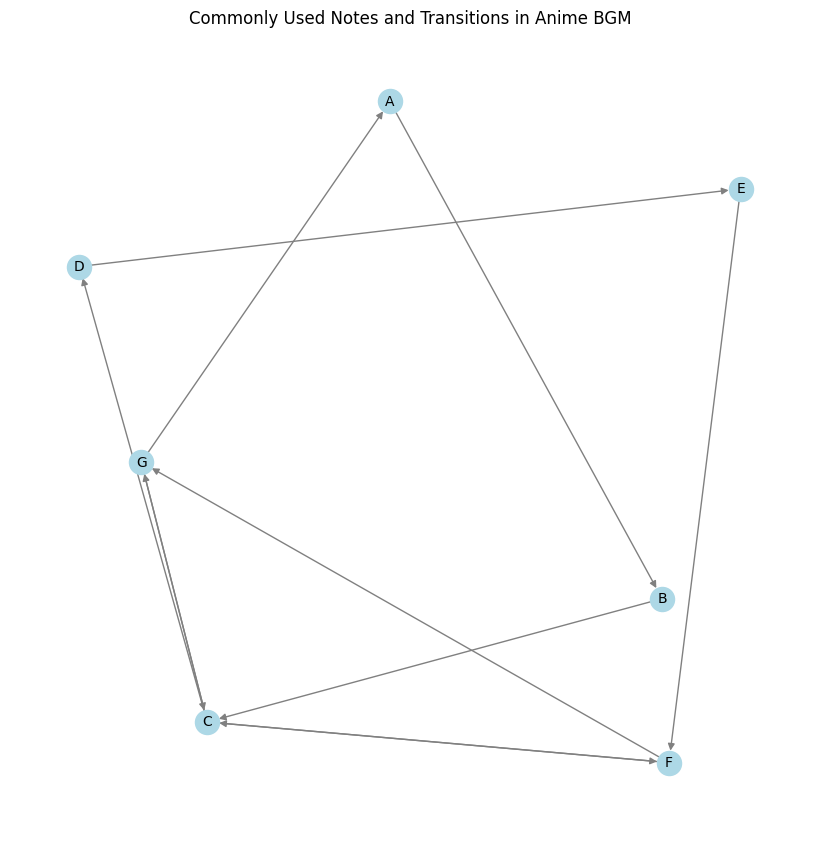

In [ ]:
import numpy as np
import networkx as nx
import sounddevice as sd
import sounddevice as sd
from scipy.io.wavfile import write

# Q2a: Data preparation
notes = ['C', 'D', 'E', 'F', 'G', 'A', 'B']
note_to_idx = {note: i for i, note in enumerate(notes)}

# Sample data representing commonly used notes and transitions in anime BGM
note_transitions = [
    ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'A'), ('A', 'B'), ('B', 'C'),
    ('C', 'F'), ('F', 'C'), ('G', 'C'), ('C', 'G')
]

# Q2b: Find the most used melody or notes
G = nx.DiGraph()
G.add_edges_from(note_transitions)
most_used_notes = sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True)[:5]
print("Most used notes:", [note for note, _ in most_used_notes])

# Q2c: Create a graph that shows the commonly used notes and their transitions
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10)
plt.title("Commonly Used Notes and Transitions in Anime BGM")
plt.savefig('anime_bgm_graph.png')

# Q2d: Create a 30-second audio piece inspired by Japanese anime BGM
sample_rate = 44100
duration = 30  # 30 seconds
time = np.linspace(0, duration, int(duration * sample_rate), False)

# Generate a sequence of notes based on the graph
note_sequence = []
current_note = 'C'
for _ in range(int(duration * 4)):  # Generate 4 notes per second
    next_note = np.random.choice([neighbor for neighbor in G.neighbors(current_note)])
    note_sequence.append(note_to_idx[current_note])
    current_note = next_note

# Generate sine waves for the notes and concatenate them
audio = np.zeros_like(time)
for note in note_sequence:
    frequency = 261.63 * 2 ** (note / 12)  # Middle C frequency
    audio += np.sin(2 * np.pi * frequency * time)

# Normalize and write the audio to a file
audio /= np.max(np.abs(audio))
write(f'{os.getenv("B240007A")}_anime_bgm.wav', sample_rate, (audio * 32767).astype(np.int16))
print(f"Audio file saved as {os.getenv('B240007A')}B240007A_anime_bgm.wav")

Question 3


In [8]:
import pandas as pd

data = {
    "Name": ["Petronas Towers", "Langkawi Sky Bridge", "A'Famosa"],
    "Latitude": [3.1578, 6.3671, 2.1913],
    "Longitude": [101.7119, 99.6641, 102.2520],
    "Description": [
        "Famous twin skyscrapers in Kuala Lumpur.",
        "Scenic bridge with a panoramic view of Langkawi.",
        "Historical Portuguese fortress in Malacca."
    ],
    "Type": ["Historical Site", "Natural Wonder", "Historical Site"]
}

df = pd.DataFrame(data)
df.to_csv("tourist_attractions.csv", index=False)


In [9]:
import folium
import pandas as pd

# Load the dataset
df = pd.read_csv("tourist_attractions.csv")

# Initialize a map
tourist_map = folium.Map(location=[4.2105, 101.9758], zoom_start=6)

# Add markers for each tourist attraction
for index, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"<b>{row['Name']}</b><br>{row['Description']}",
        tooltip=row["Name"]
    ).add_to(tourist_map)

# Save map to an HTML file
tourist_map.save("interactive_map.html")


In [10]:
from folium.plugins import FeatureGroupSubGroup

# Create different layers for types of attractions
base_map = folium.Map(location=[4.2105, 101.9758], zoom_start=6)
layer_control = folium.LayerControl()

# Define marker colors for each type
marker_colors = {
    "Historical Site": "blue",
    "Natural Wonder": "green",
    "Amusement Park": "red"
}

# Add attractions with color-coded markers
for index, row in df.iterrows():
    color = marker_colors.get(row["Type"], "gray")
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"<b>{row['Name']}</b><br>{row['Description']}",
        tooltip=row["Name"],
        icon=folium.Icon(color=color)
    ).add_to(base_map)

# Add layer control
base_map.add_child(layer_control)
base_map.save("customized_map.html")


In [11]:
total_attractions = len(df)
folium.Marker(
    location=[4.2105, 101.9758],
    popup=f"<b>Total Attractions:</b> {total_attractions}",
    tooltip="Total Attractions"
).add_to(base_map)


In [13]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.1 MB/s eta 0:00:00


In [14]:
import streamlit as st

# Streamlit app
st.title("Interactive Map of Malaysian Tourist Attractions")
st.write(f"Total Attractions: {total_attractions}")

# Display map
st.markdown(f"<iframe src='customized_map.html' width='100%' height='600'></iframe>", unsafe_allow_html=True)


2024-12-31 04:48:01.728 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-31 04:48:01.879 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-31 04:48:01.882 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-31 04:48:01.885 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-31 04:48:01.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-31 04:48:01.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-31 04:48:01.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-31 04:48:01.902 Thread 'MainThread': mi

DeltaGenerator()

Question 4

In [16]:
import pandas as pd

# Sample data
data = {
    "Salary": [3000, 5000, 7000, 10000],
    "House Price": [200000, 300000, 400000, 500000],
    "State": ["Johor", "Selangor", "Penang", "Kuala Lumpur"],
    "House Type": ["Apartment", "Terrace", "Semi-D", "Bungalow"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to a CSV file
df.to_csv("house_affordability.csv", index=False)

print("File created successfully!")



File created successfully!


In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv("house_affordability.csv")

# Check for missing values and handle them
print("Missing values:\n", df.isnull().sum())
df.fillna(df.median(), inplace=True)  # Fill missing numeric values with median


Missing values:
 Salary         0
House Price    0
State          0
House Type     0
dtype: int64


TypeError: Cannot convert [['Johor' 'Selangor' 'Penang' 'Kuala Lumpur']
 ['Apartment' 'Terrace' 'Semi-D' 'Bungalow']] to numeric

             Salary    House Price
count      4.000000       4.000000
mean    6250.000000  350000.000000
std     2986.078811  129099.444874
min     3000.000000  200000.000000
25%     4500.000000  275000.000000
50%     6000.000000  350000.000000
75%     7750.000000  425000.000000
max    10000.000000  500000.000000


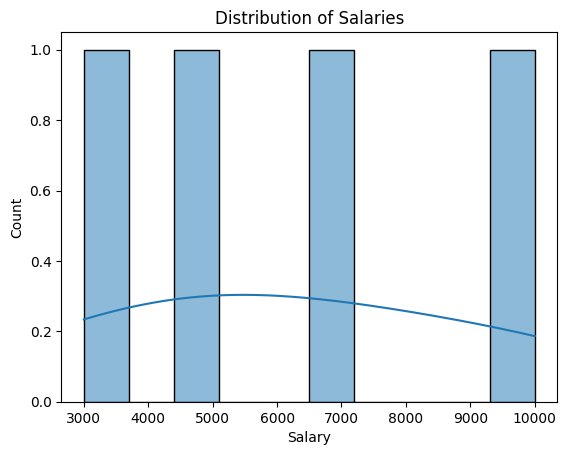

ValueError: could not convert string to float: 'Johor'

<Figure size 800x600 with 0 Axes>

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Visualize salary distribution
sns.histplot(df['Salary'], bins=10, kde=True)
plt.title("Distribution of Salaries")
plt.show()

# Visualize correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pair plot (optional, to see relationships between variables)
sns.pairplot(df, hue="House Type")
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode categorical features
encoder = LabelEncoder()
df['State'] = encoder.fit_transform(df['State'])
df['House Type'] = encoder.fit_transform(df['House Type'])

# Features and target
X = df[['Salary', 'House Price', 'State']]
y = df['House Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Print accuracy scores
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))


Decision Tree Accuracy: 0.0
Random Forest Accuracy: 0.0


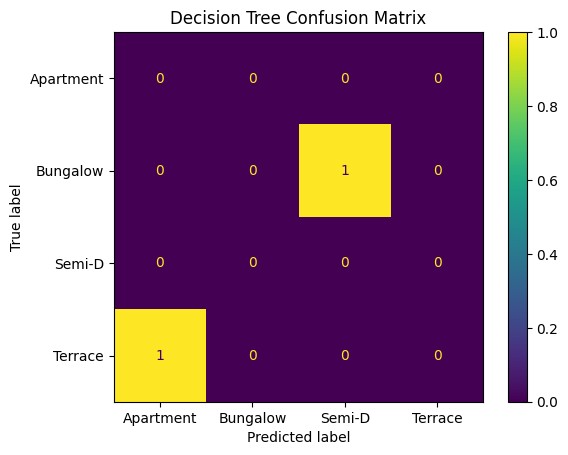

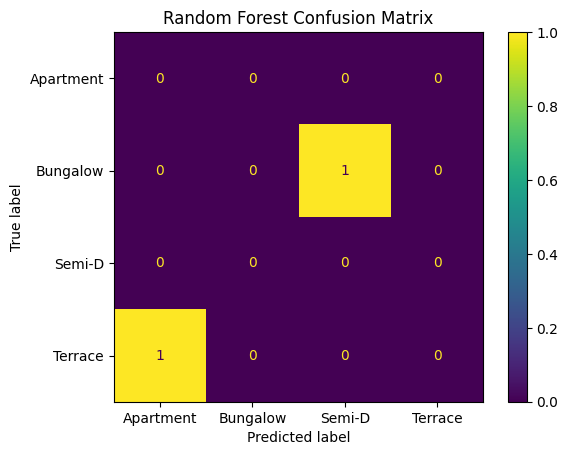

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(dt_cm, display_labels=encoder.classes_).plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
ConfusionMatrixDisplay(rf_cm, display_labels=encoder.classes_).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# Print classification reports
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
